# Linear regression

## Short EDA on ads data

In [1]:
import pandas as pd
df = pd.read_csv('Advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


** features/independent variable: TV, radio, newspaper

** label/target/dependent variable: sales

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
df.shape

(200, 4)

<Axes: xlabel='TV', ylabel='sales'>

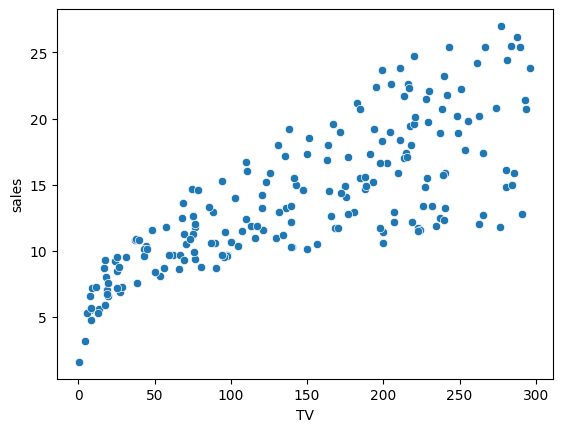

In [3]:
import seaborn as sns
# one example plot
sns.scatterplot(data=df, x='TV', y='sales')

[Text(0.5, 1.0, 'Newspaper spending vs sales')]

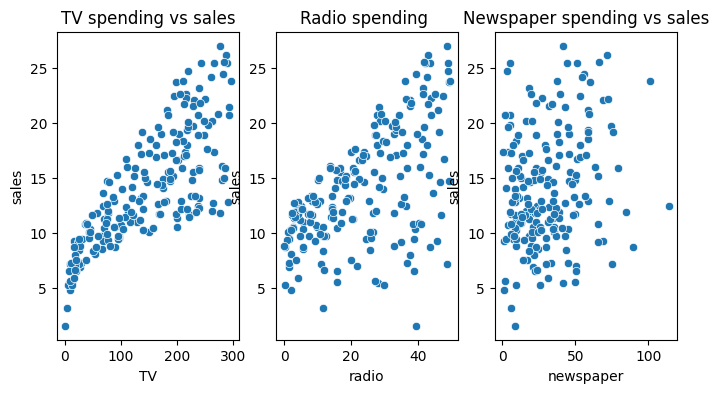

In [5]:
import matplotlib.pyplot as plt

# want to plot TV, radio, news vs sales on the 3 axes

fig, axes = plt.subplots(1,3, figsize= (8,4))
sns.scatterplot(data = df, x= 'TV' ,y= 'sales',ax= axes[0])
sns.scatterplot(data = df, x= 'radio' ,y= 'sales',ax= axes[1])
sns.scatterplot(data = df, x= 'newspaper' ,y= 'sales',ax= axes[2])

axes[0].set(title='TV spending vs sales')
axes[1].set(title='Radio spending ')
axes[2].set(title='Newspaper spending vs sales')

same as above, but put into loop to keep it more DRY

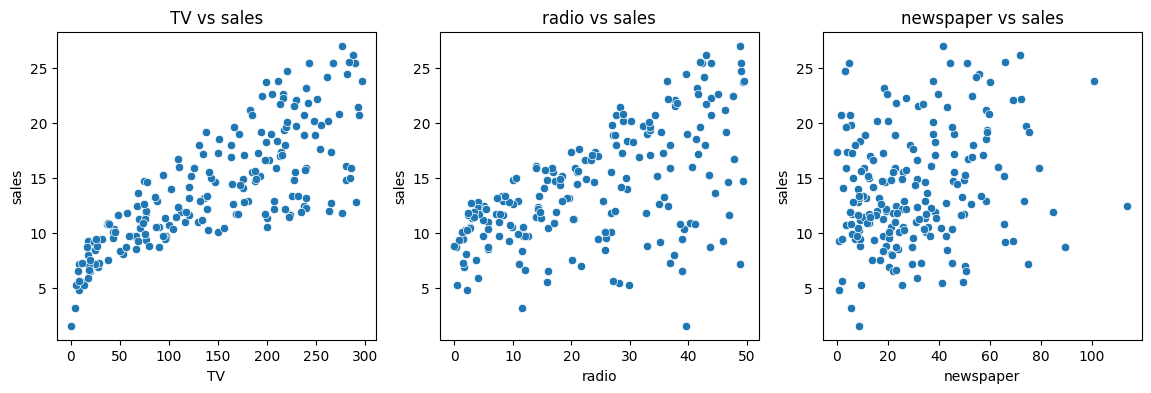

In [6]:
fig, axes = plt.subplots(1,3, figsize= (14,4))
features = ('TV', 'radio','newspaper')

for feature, ax in zip(features, axes.flatten ()):
    sns.scatterplot(data = df, x= feature ,y= 'sales',ax= ax)
    ax.set(title= f'{feature} vs sales')


## Scikit-learn steps

See this as a recipe to follow, works for most classic machine learning algorithms with some modifications

steps:

0. divide into features X and label y
1. train|test split
2. scale dataset (some algorithms don't need scaling)
3. fit algorithm with training data
4. transform training data and test data
5. evaluate on test data

## 0. divide into features X and label y

In [7]:
y= df['sales']
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [8]:
X =df.drop('sales', axis=1)
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


common way that I will do the above with tuple unpacking

In [9]:
X, y = df.drop('sales', axis=1) , df['sales']
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

### 1. train | test split

possible to do manually, but sklearn has this implemented off the shelf that we can use

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (134, 3)
X_test.shape = (66, 3)
y_train.shape = (134,)
y_test.shape = (66,)


In [18]:
X_train.head()

,TV,radio,newspaper
43,293.6,27.7,1.8
190,18.7,12.1,23.4
91,134.3,4.9,9.3
137,25.6,39.0,9.3
52,100.4,9.6,3.6


In [19]:
y_test.head()

96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
Name: sales, dtype: float64

- $X' = \frac{X-X_{min}}{X_{max}-X_{min}}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# instantiate a MinMaxSCcaler instance
scaler = MinMaxScaler()
#imporrtant note: fit on X_train and not X_test -> this avoids data leakage
scaler.fit(X_train) # use training dara to fit the scaler

# transforms or scales X_train and X_test
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape


((134, 3), (66, 3))

In [23]:
scaled_X_train.min(), scaled_X_train.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
# we have used parameters x_min and x_max from X_train to scale X_test
# if you get exactly 0 and 1 here then probably you have fit X_test which would leak data
scaled_X_test.min(), scaled_X_test.max()

(np.float64(0.005964214711729622), np.float64(1.1302186878727631))

## 3. Linear regression

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# put in training data features aand label
model.fit(scaled_X_train, y_train)

model.intercept_, model.coef_

(np.float64(2.79115951962436), array([13.20747617,  9.75285112,  0.61108329]))

In [29]:
X_test.iloc[0]

TV           163.3
radio         31.6
newspaper     52.9
Name: 96, dtype: float64

test manual prediction

In [28]:
# TV, radio, newspaper but scaled
test_sample_feature = scaled_X_test[0]

test_sample_feature

array([0.54988164, 0.63709677, 0.52286282])

In [31]:
w = model.coef_
w0 = model.intercept_ 
print("prediction on the test sample")
w0 + w[0]*test_sample_feature[0] + w[1]*test_sample_feature[1] + w[2]*test_sample_feature[2]

prediction on the test sample


np.float64(16.586730852231774)

In [32]:
print("label for our test sample")
y_test.iloc[0]

label for our test sample


np.float64(16.9)